In [1285]:
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


/tmp/ipykernel_1696984/3620799528.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [1286]:
symbols = "SPY" , "KO", "GOOG", "NKE", "V", "CL", "QQQ", "MCD"
df_multiple_symbols = yf.download(symbols, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  8 of 8 completed


In [1287]:
df_multiple_symbols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, CL)    2518 non-null   float64
 1   (Adj Close, GOOG)  2518 non-null   float64
 2   (Adj Close, KO)    2518 non-null   float64
 3   (Adj Close, MCD)   2518 non-null   float64
 4   (Adj Close, NKE)   2518 non-null   float64
 5   (Adj Close, QQQ)   2518 non-null   float64
 6   (Adj Close, SPY)   2518 non-null   float64
 7   (Adj Close, V)     2518 non-null   float64
 8   (Close, CL)        2518 non-null   float64
 9   (Close, GOOG)      2518 non-null   float64
 10  (Close, KO)        2518 non-null   float64
 11  (Close, MCD)       2518 non-null   float64
 12  (Close, NKE)       2518 non-null   float64
 13  (Close, QQQ)       2518 non-null   float64
 14  (Close, SPY)       2518 non-null   float64
 15  (Close, V)         2518 non-null   float64
 16  (High,

In [1288]:
df_multiple_symbols = df_multiple_symbols["Close"]
df_multiple_symbols

,CL,GOOG,KO,MCD,NKE,QQQ,SPY,V
Date,,,,,,,,
2013-01-02,53.154999,18.013729,37.599998,90.120003,25.920000,67.199997,146.059998,38.845001
2013-01-03,53.330002,18.024191,37.599998,90.629997,26.184999,66.849998,145.729996,38.875000
2013-01-04,53.950001,18.380356,37.660000,89.849998,26.440001,66.629997,146.369995,39.192501
2013-01-07,53.040001,18.300158,37.299999,90.910004,26.480000,66.650002,145.970001,39.472500
2013-01-08,53.160000,18.264042,37.040001,90.940002,26.200001,66.519997,145.550003,39.840000
...,...,...,...,...,...,...,...,...
2022-12-23,79.449997,89.809998,63.820000,267.570007,116.250000,267.359985,382.910004,205.830002
2022-12-27,79.940002,87.930000,64.209999,266.839996,117.559998,263.579987,381.399994,206.289993
2022-12-28,78.820000,86.459999,63.570000,265.109985,114.980003,260.100006,376.660004,204.990005


In [1289]:
#ainult SPY ja DataFrameks
df_multiple_symbols = pd.DataFrame(df_multiple_symbols['SPY']) 

In [1290]:
df_multiple_symbols['SMA1'] = df_multiple_symbols['SPY'].rolling(55).mean() 
df_multiple_symbols['SMA2'] = df_multiple_symbols['SPY'].rolling(252).mean() 


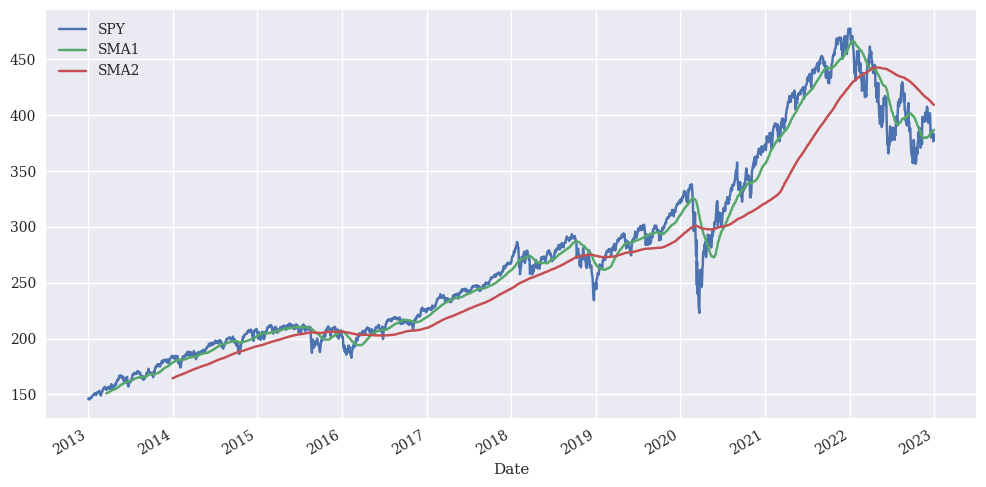

In [1291]:
df_multiple_symbols.plot(figsize=(12, 6));

In [1292]:
df_multiple_symbols.tail()

,SPY,SMA1,SMA2
Date,,,
2022-12-23,382.910004,385.369637,410.678811
2022-12-27,381.399994,385.708000,410.298414
2022-12-28,376.660004,386.010546,409.900755
2022-12-29,383.440002,386.477819,409.527580
2022-12-30,382.429993,386.948182,409.155636


/tmp/ipykernel_1696984/3201822249.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


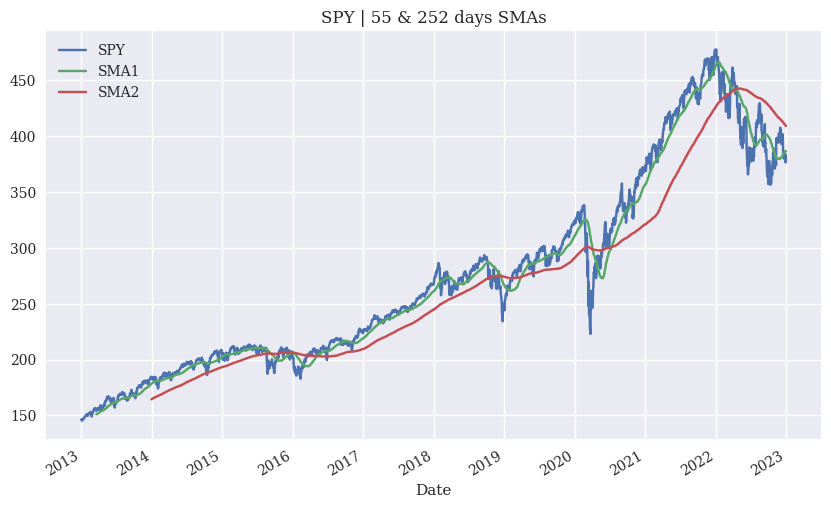

In [1293]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
df_multiple_symbols.plot(title='SPY | 55 & 252 days SMAs',
figsize=(10, 6));

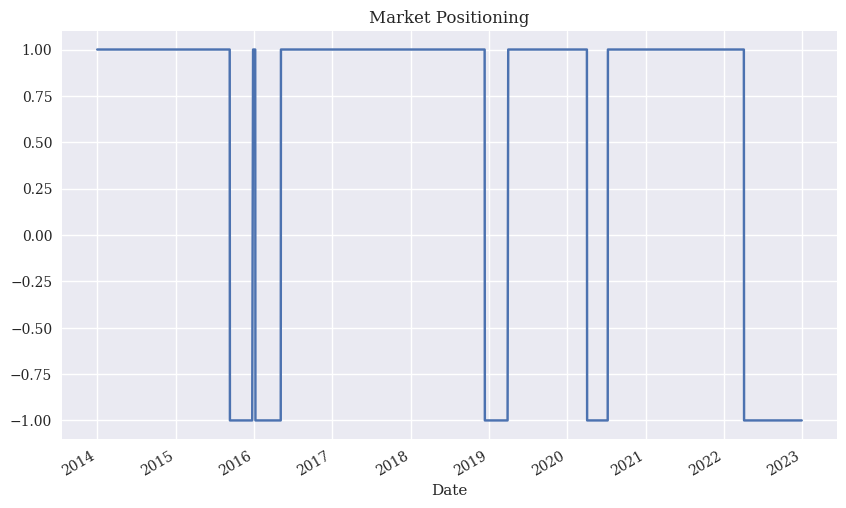

In [1294]:
df_multiple_symbols['position'] = np.where(df_multiple_symbols['SMA1'] > df_multiple_symbols['SMA2'], 1, -1)
df_multiple_symbols.dropna(inplace=True) 
df_multiple_symbols['position'].plot(ylim=[-1.1, 1.1],title='Market Positioning',figsize=(10, 6));

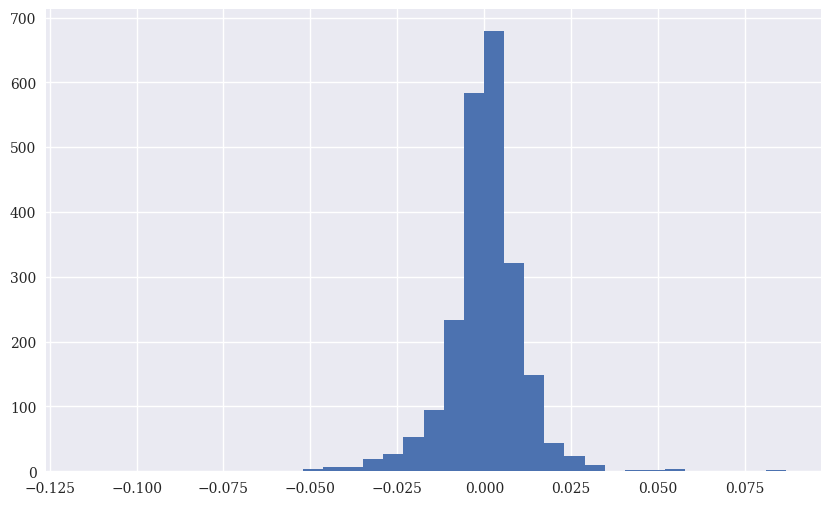

In [1295]:
df_multiple_symbols['returns'] = np.log(df_multiple_symbols['SPY'] / df_multiple_symbols['SPY'].shift(1)) 
df_multiple_symbols['returns'].hist(bins=35, figsize=(10, 6)); 

In [1296]:
df_multiple_symbols['strategy'] = df_multiple_symbols['position'].shift(1) * df_multiple_symbols['returns'] 
df_multiple_symbols[['returns', 'strategy']].sum()


returns     0.727867
strategy    0.213307
dtype: float64

In [1297]:
df_multiple_symbols[['returns', 'strategy']].sum().apply(np.exp) 

returns     2.070659
strategy    1.237765
dtype: float64

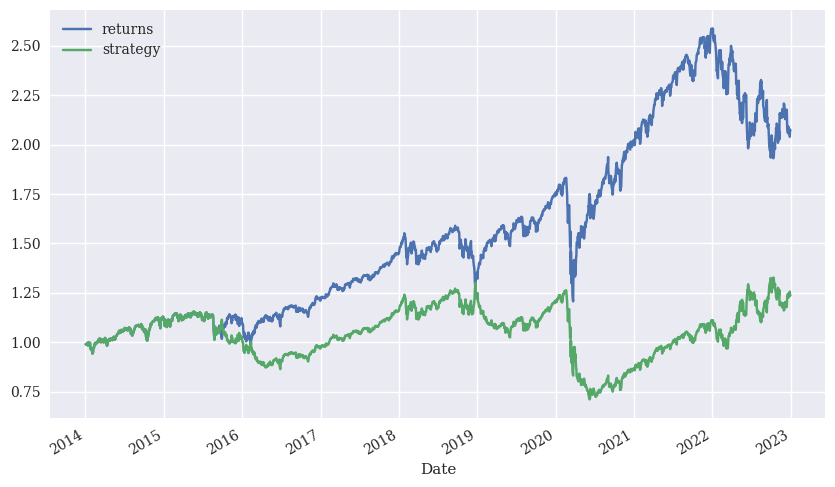

In [1298]:
df_multiple_symbols[['returns', 'strategy']].cumsum( ).apply(np.exp).plot(figsize=(10, 6));

In [1299]:
df_multiple_symbols[['returns', 'strategy']].mean() * 252 

returns     0.080945
strategy    0.023722
dtype: float64

In [1300]:
np.exp(df_multiple_symbols[['returns', 'strategy']].mean() * 252) - 1 

returns     0.084312
strategy    0.024005
dtype: float64

In [1301]:
df_multiple_symbols[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.180899
strategy    0.180965
dtype: float64

In [1302]:
(df_multiple_symbols[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5 

returns     0.180228
strategy    0.180244
dtype: float64

In [1303]:
df_multiple_symbols['cumret'] = df_multiple_symbols['strategy'].cumsum().apply(np.exp) 

In [1304]:
df_multiple_symbols['cummax'] = df_multiple_symbols['cumret'].cummax() 

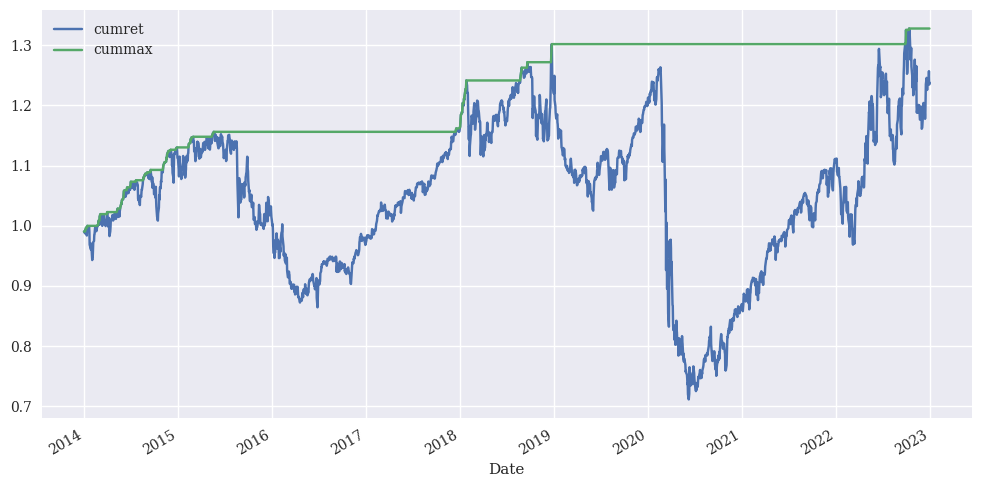

In [1305]:
df_multiple_symbols[['cumret', 'cummax']].dropna().plot(figsize=(12, 6));

In [1306]:
drawdown = df_multiple_symbols['cummax'] - df_multiple_symbols['cumret']
drawdown.max() 

0.5900660502583578

In [1307]:
temp = drawdown[drawdown == 0] 

In [1308]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime()) 

In [1309]:
import numpy as np
import pandas as pd
from scipy.optimize import brute
import yfinance as yf
 
class SMAVectorBacktester(object):

    def __init__(self, symbol, SMA1, SMA2, start, end):
        self.symbol = symbol
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.start = start
        self.end = end
        self.results = None
        self.get_data()

    def get_data(self):

        symbols = "SPY", "KO"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        raw['SMA1'] = raw['price'].rolling(self.SMA1).mean()
        raw['SMA2'] = raw['price'].rolling(self.SMA2).mean()
        self.data = raw

    def set_parameters(self, SMA1=None, SMA2=None):

        if SMA1 is not None:
            self.SMA1 = SMA1
            self.data['SMA1'] = self.data['price'].rolling(
                self.SMA1).mean()
        if SMA2 is not None:
            self.SMA2 = SMA2
            self.data['SMA2'] = self.data['price'].rolling(self.SMA2).mean()

    def run_strategy(self):

        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['return']
        data.dropna(inplace=True)
        data['creturns'] = data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # gross performance of the strategy
        aperf = data['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - data['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):

        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | SMA1=%d, SMA2=%d' % (self.symbol,
        self.SMA1, self.SMA2)
        self.results[['creturns', 'cstrategy']].plot(title=title,
        figsize=(10, 6))

    def update_and_run(self, SMA):

        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.run_strategy()[0]

    def optimize_parameters(self, SMA1_range, SMA2_range):

        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

if __name__ == '__main__':
    smabt = SMAVectorBacktester("SPY", 42, 252, "2013-01-01","2023-01-01")
    print(smabt.run_strategy())
    smabt.set_parameters(SMA1=20, SMA2=100)
    print(smabt.run_strategy())
    print(smabt.optimize_parameters((30, 56, 4), (200, 300, 4)))


[*********************100%***********************]  2 of 2 completed
(1.39, -0.68)
(1.03, -1.28)
(array([ 46., 240.]), 1.51)


In [1310]:
SMAVectorBacktester

__main__.SMAVectorBacktester

In [1311]:
smabt = SMAVectorBacktester('SPY', 42, 252, "2013-1-1", "2019-12-31")

[*********************100%***********************]  2 of 2 completed


In [1312]:
smabt.run_strategy()

(1.22, -0.52)

In [1313]:
%%time
smabt.optimize_parameters((30, 50, 2),(200, 300, 2)) 

CPU times: user 4.05 s, sys: 13.6 ms, total: 4.07 s
Wall time: 4.49 s


(array([ 32., 216.]), 1.55)

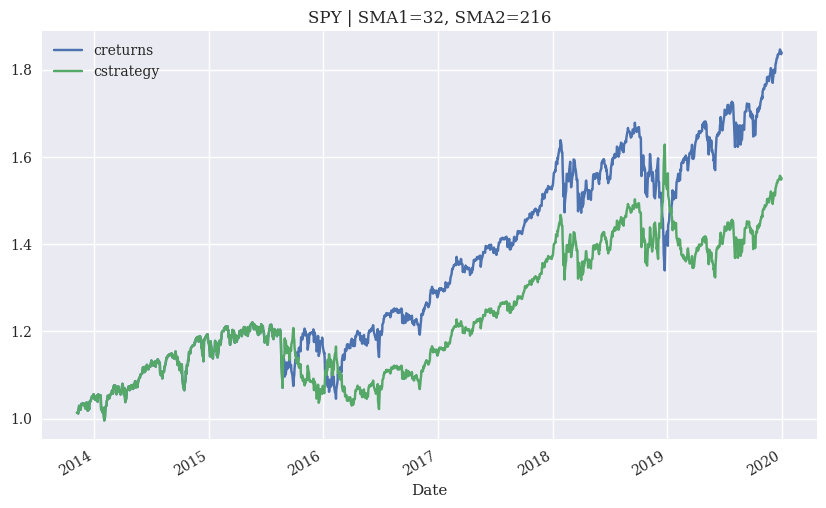

In [1314]:
smabt.plot_results() 

In [1315]:
#momentum strategies

In [1316]:
data = pd.DataFrame(df_multiple_symbols['SPY'])

In [1317]:
data.rename(columns={'SPY': 'price'}, inplace=True)

In [1318]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [1319]:
data['position'] = np.sign(data['returns']) 

In [1320]:
data['strategy'] = data['position'].shift(1) * data['returns'] 

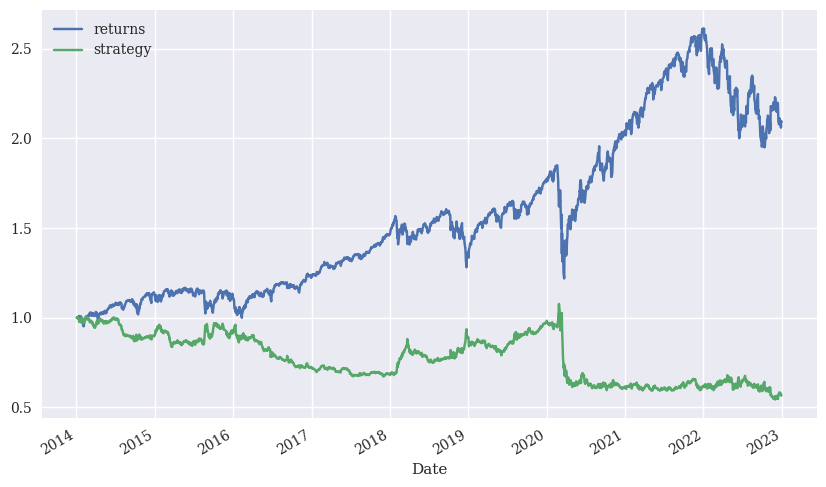

In [1321]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6)); 

In [1322]:
data['position'] = np.sign(data['returns'].rolling(3).mean()) 

In [1323]:
data['strategy'] = data['position'].shift(1) * data['returns']

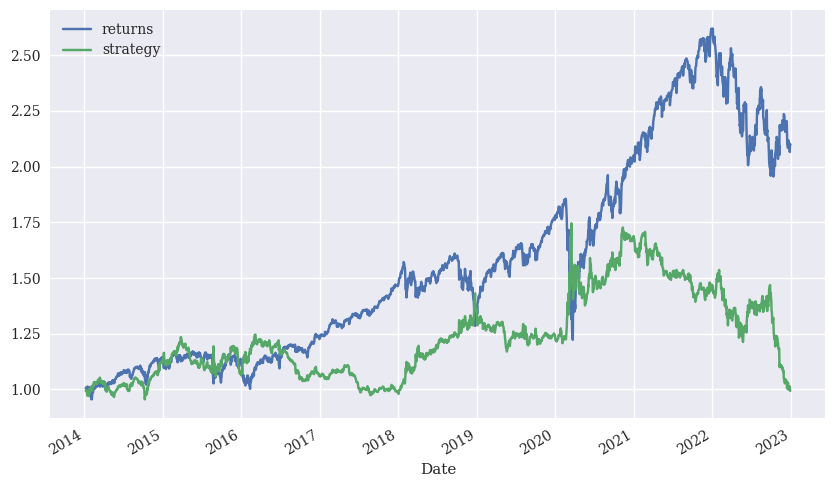

In [1324]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [1325]:
#SPY 1 tunnine time period ja 356 päeva
symbols = "SPY"
data = yf.download(symbols, start="2022-01-01", end="2023-01-01", period="1h")

[*********************100%***********************]  1 of 1 completed


In [1326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [1327]:
data['returns'] = np.log(data['Close'] /  data['Close'].shift(1)) 

In [1328]:
to_plot = ['returns'] 

In [1329]:
for m in [1, 3, 5, 7, 9]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = (data['position_%d' % m].shift(1) *
    data['returns'])
    to_plot.append('strategy_%d' % m) 

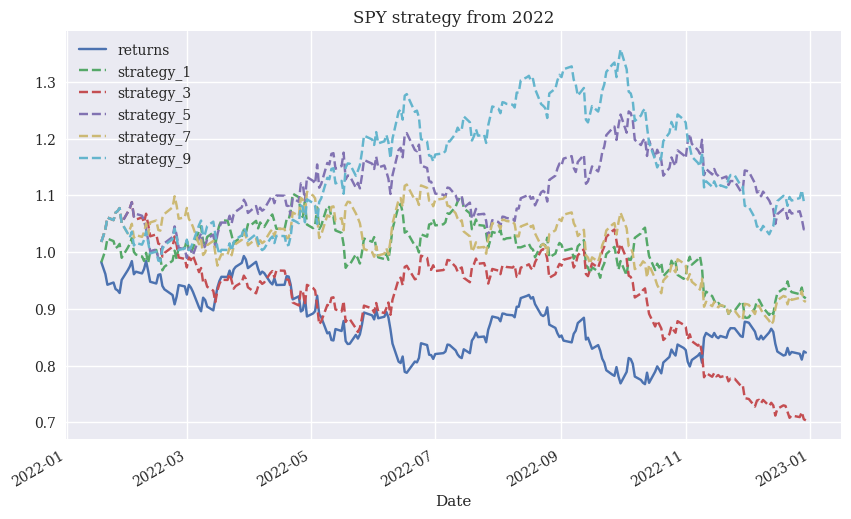

In [1330]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='SPY strategy from 2022',
    figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);

In [1331]:
import numpy as np
import pandas as pd

class MomVectorBacktester(object):

    def __init__(self, symbol, start, end, amount, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.results = None
        self.get_data()

    def get_data(self):

        symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw

    def run_strategy(self, momentum=1):
        ''' Backtests the trading strategy.
        '''
        self.momentum = momentum
        data = self.data.copy().dropna()
        data['position'] = np.sign(data['return'].rolling(momentum).mean())
        data['strategy'] = data['position'].shift(1) * data['return']
        # determine when a trade takes place
        data.dropna(inplace=True)
        trades = data['position'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        aperf = data['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f' % (self.symbol, self.tc)
        self.results[['creturns', 'cstrategy']].plot(title=title,
        figsize=(10, 6))


if __name__ == '__main__':
    mombt = MomVectorBacktester('GLD', '2014-01-01', '2022-01-01', 10000, 0.0)
    print(mombt.run_strategy())
    print(mombt.run_strategy(momentum=2))
    mombt = MomVectorBacktester('GLD', '2014-01-01', '2022-01-01', 10000, 0.001)
    print(mombt.run_strategy(momentum=2))

[*********************100%***********************]  10 of 10 completed
(10332.21, -3999.25)
(7440.85, -6865.43)
[*********************100%***********************]  10 of 10 completed
(3788.55, -10517.72)


In [1332]:
mombt = MomVectorBacktester('GLD', '2010-1-1','2019-12-31', 10000, 0.0) 

[*********************100%***********************]  10 of 10 completed


In [1333]:
mombt.run_strategy(momentum=3)

(18371.5, 9408.31)

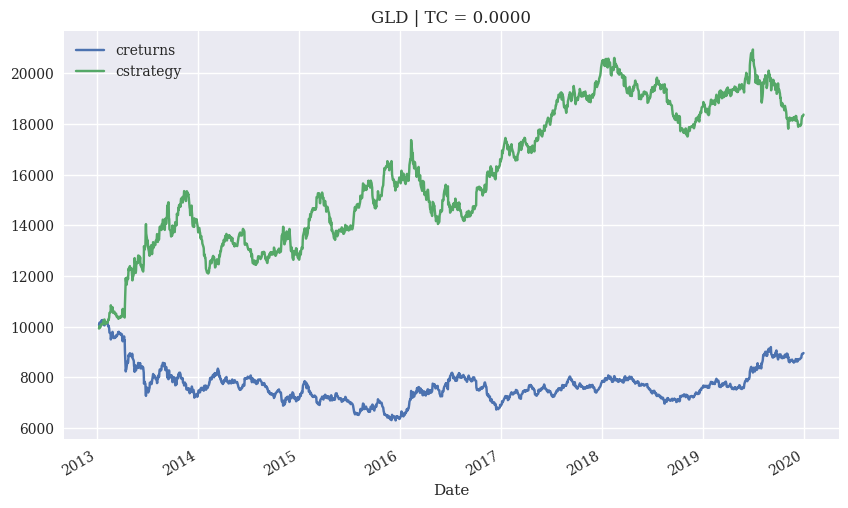

In [1334]:
mombt.plot_results()

In [1335]:
mombt = MomVectorBacktester('GLD', '2014-1-1','2022-12-31', 10000, 0.001) 

[*********************100%***********************]  10 of 10 completed


In [1336]:
mombt.run_strategy(momentum=3) 

(8602.99, -5674.06)

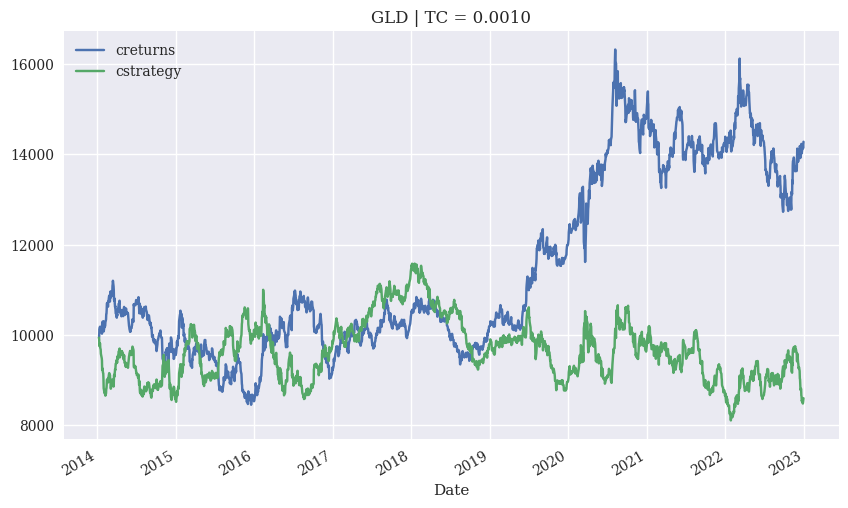

In [1337]:
mombt.plot_results()

In [1338]:
symbols = "KO"
data = yf.download(symbols, start="2013-01-01", end="2023-01-01")
#data = pd.DataFrame(data['SPY'])
data.iloc[:1]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,36.990002,37.599998,36.66,37.599998,27.03393,21872400


In [1339]:
data.rename(columns={'KO': 'price'}, inplace=True)

In [1340]:
data['returns'] = np.log(data['Close'] / data['Close'].shift(1))

In [1341]:
SMA = 21

In [1342]:
data['SMA'] = data['Close'].rolling(SMA).mean() 

In [1343]:
threshold = 2

In [1344]:
data['distance'] = data['Close'] - data['SMA'] 

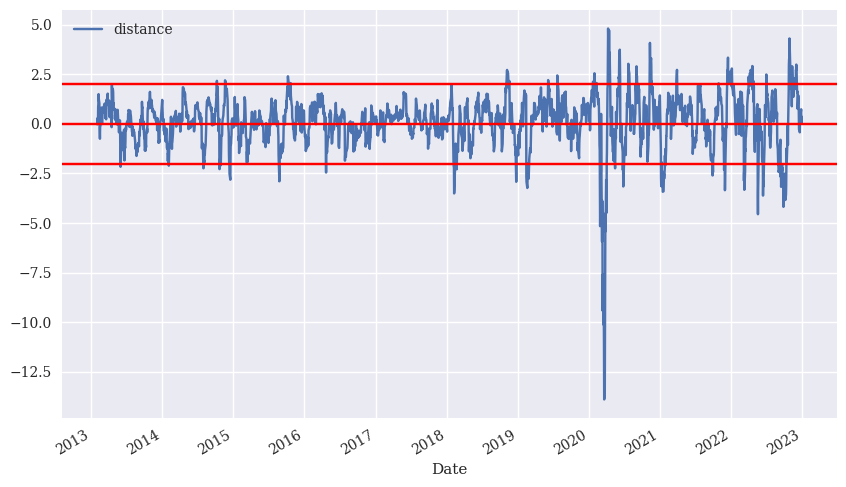

In [1345]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

In [1346]:
data['position'] = np.where(data['distance'] > threshold,  -1, np.nan)

In [1347]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position']) 

In [1348]:
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position']) 

In [1349]:
data['position'] = data['position'].ffill().fillna(0) 

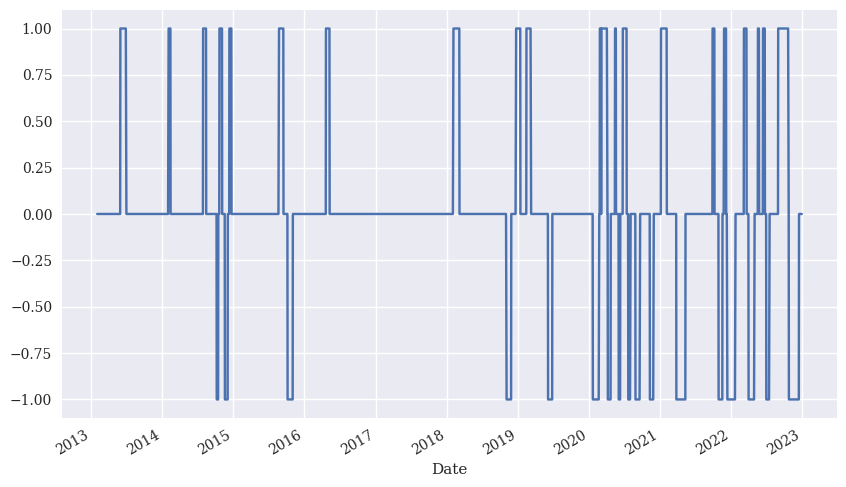

In [1350]:
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],  figsize=(10, 6)); 

In [1351]:
data['strategy'] = data['position'].shift(1) * data['returns']

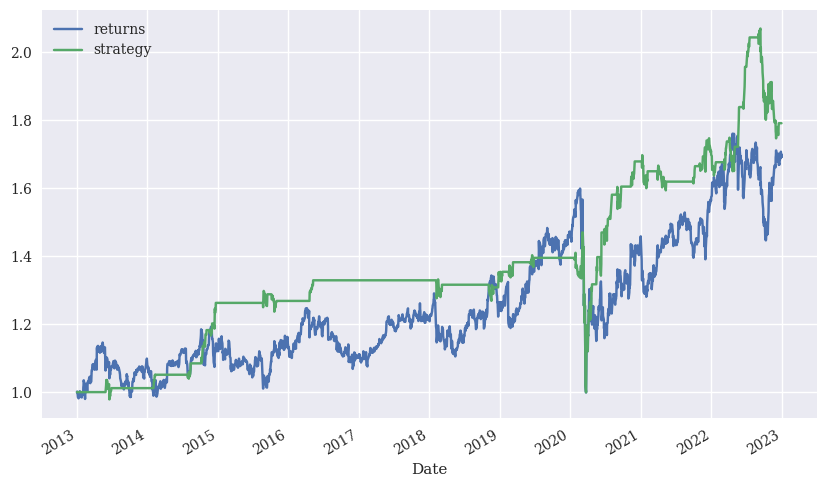

In [1352]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [1353]:

class MRVectorBacktester(MomVectorBacktester):


    def run_strategy(self, SMA, threshold):

        data = self.data.copy().dropna()
        data['sma'] = data['price'].rolling(SMA).mean()
        data['distance'] = data['price'] - data['sma']
        data.dropna(inplace=True)
        # sell signals
        data['position'] = np.where(data['distance'] > threshold,
                                    -1, np.nan)
        # buy signals
        data['position'] = np.where(data['distance'] < -threshold,
                                    1, data['position'])
        # crossing of current price and SMA (zero distance)
        data['position'] = np.where(data['distance'] *
                                    data['distance'].shift(1) < 0,
                                    0, data['position'])
        data['position'] = data['position'].ffill().fillna(0)
        data['strategy'] = data['position'].shift(1) * data['return']
        # determine when a trade takes place
        trades = data['position'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * \
            data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        aperf = self.results['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)


if __name__ == '__main__':
    mrbt = MRVectorBacktester('KO', '2010-1-1', '2020-12-31', 10000, 0.0)
    print(mrbt.run_strategy(SMA=25, threshold=5))
    mrbt = MRVectorBacktester('KO', '2010-1-1', '2020-12-31', 10000, 0.001)
    print(mrbt.run_strategy(SMA=25, threshold=5))
    mrbt = MRVectorBacktester('KO', '2010-1-1', '2020-12-31', 10000, 0.001)
    print(mrbt.run_strategy(SMA=42, threshold=7.5))

[*********************100%***********************]  10 of 10 completed
(8968.38, -5346.42)
[*********************100%***********************]  10 of 10 completed
(8950.46, -5364.34)
[*********************100%***********************]  10 of 10 completed
(9971.55, -4155.18)


In [1354]:
mrbt = MRVectorBacktester("XLU", '2013-01-01', '2022-12-31', 10000, 0.001) 

[*********************100%***********************]  10 of 10 completed


In [1365]:
mrbt.run_strategy(SMA=55, threshold=2)

(22169.34, 3670.26)

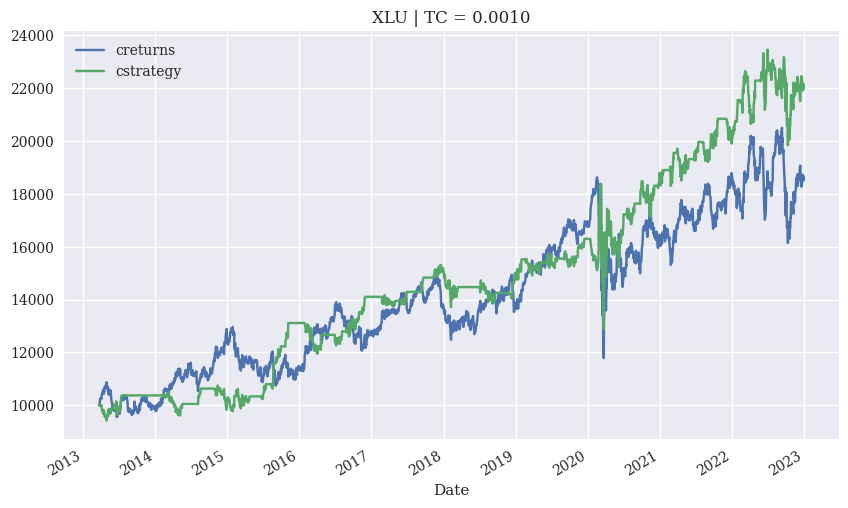

In [1366]:
mrbt.plot_results()

In [1376]:
symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
data = yf.download(symbols, start="2013-01-01", end="2023-01-01")
data = data["Close"]

[*********************100%***********************]  10 of 10 completed


In [1377]:
symbol = 'KO'
data = pd.DataFrame(data[symbol]) 

In [1378]:
data.rename(columns={symbol: 'price'}, inplace=True) 

In [1379]:
lags = 5

In [1380]:
cols = []
for lag in range(1, lags + 1):
     col = f'lag_{lag}'
     data[col] = data['price'].shift(lag)
     cols.append(col)
     data.dropna(inplace=True)

In [1381]:
reg = np.linalg.lstsq(data[cols], data['price'],  rcond=None)[0]

In [1382]:
reg

array([ 0.97125664,  0.05391661, -0.06256578, -0.03756728,  0.07516061])

In [1383]:
data['prediction'] = np.dot(data[cols], reg) 

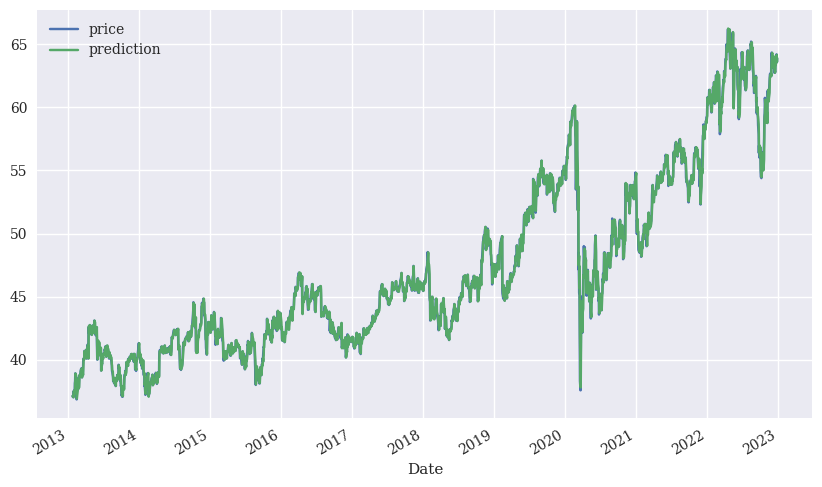

In [1384]:
data[['price', 'prediction']].plot(figsize=(10, 6)); 

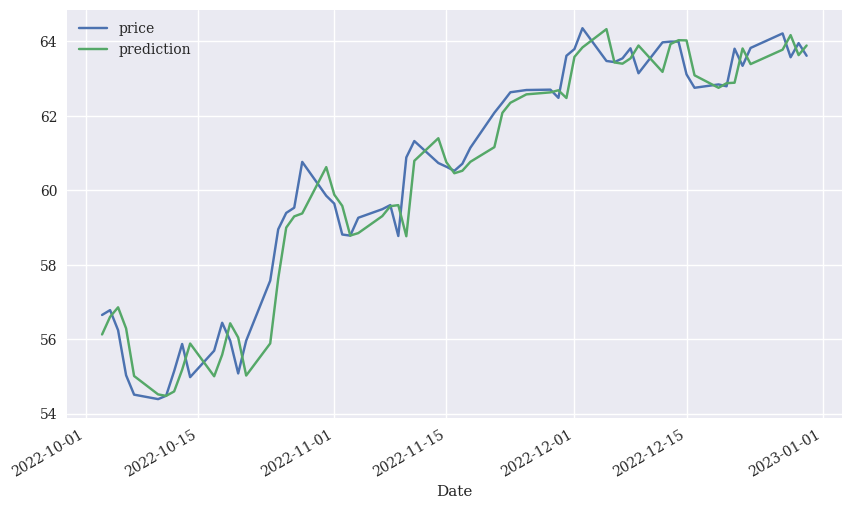

In [1387]:
data[['price', 'prediction']].loc['2022-10-1':].plot(figsize=(10, 6));

In [1388]:
##prediction future prices
data['return'] = np.log(data['price'] /  data['price'].shift(1))

In [1389]:
data.dropna(inplace=True) 

In [1390]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
    data.dropna(inplace=True)

In [1391]:
reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]

In [1392]:
reg

array([-0.02195085,  0.02767445, -0.03810781, -0.07299911,  0.06604811])

In [1393]:
data['prediction'] = np.dot(data[cols], reg)

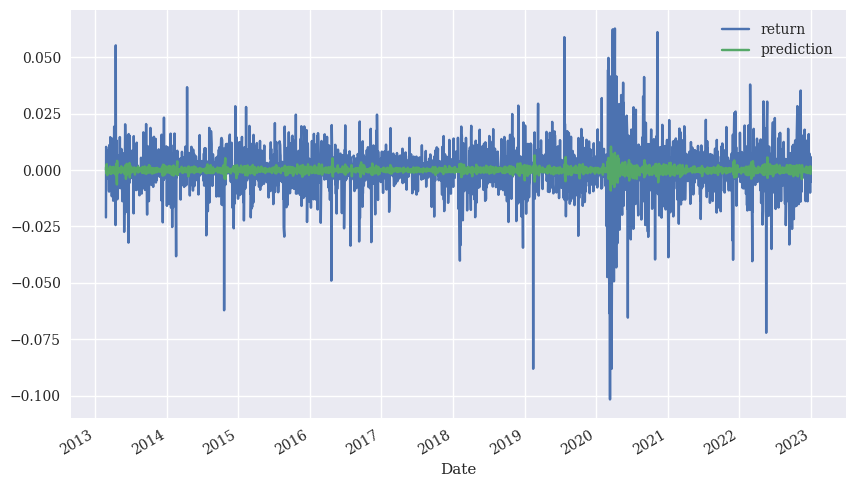

In [1394]:
data[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6));

In [1396]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [1397]:
hits

 1.0    1245
-1.0    1218
 0.0      24
Name: count, dtype: int64

In [1398]:
hits.values[0] / sum(hits)

0.5006031363088058

In [1399]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)[0] 

In [1400]:
reg

array([-2.42334226, -1.64241839, -1.43051601, -3.64523724,  1.29003216])

In [1401]:
data['prediction'] = np.sign(np.dot(data[cols], reg)) 

In [1402]:
data['prediction'].value_counts()

prediction
-1.0    1359
 1.0    1128
Name: count, dtype: int64

In [1403]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [1404]:
hits

 1.0    1246
-1.0    1217
 0.0      24
Name: count, dtype: int64

In [1405]:
hits.values[0] / sum(hits)

0.501005227181343

In [1406]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2013-02-15,37.419998,-0.009993,-0.009362,-0.027572,-0.004135,-0.003605,1.0,0.015621
2013-02-19,37.669998,0.015621,-0.009993,-0.009362,-0.027572,-0.004135,1.0,0.006659
2013-02-20,37.730000,0.006659,0.015621,-0.009993,-0.009362,-0.027572,-1.0,0.001592
2013-02-21,37.709999,0.001592,0.006659,0.015621,-0.009993,-0.009362,-1.0,-0.000530
2013-02-22,38.520000,-0.000530,0.001592,0.006659,0.015621,-0.009993,-1.0,0.021252


In [1407]:
data['strategy'] = data['prediction'] * data['return']

In [1408]:
data[['return', 'strategy']].sum().apply(np.exp) 

return      1.726656
strategy    3.111910
dtype: float64

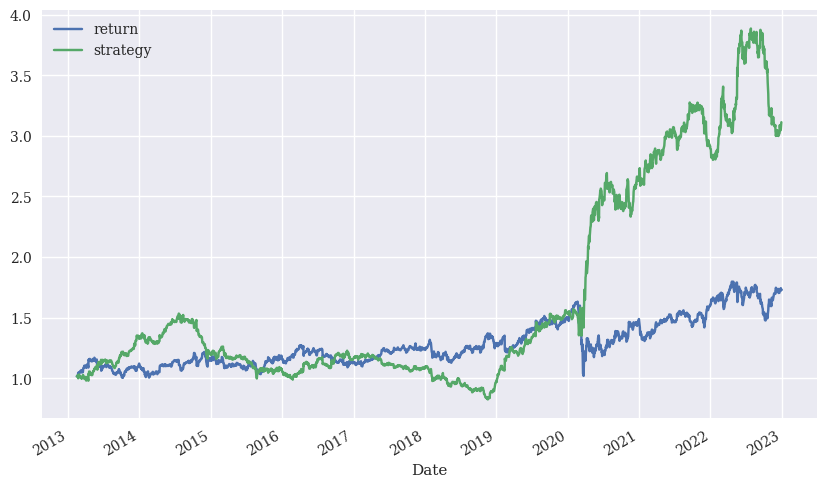

In [1409]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [1410]:

import numpy as np
import pandas as pd


class LRVectorBacktester(object):


    def __init__(self, symbol, start, end, amount, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.results = None
        self.get_data()

    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        symbols = "SPY", "KO", "JPM", "COST", "XLU", "GLD", "CL", "JNJ", "XLU", "XLP", "X"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['returns'] = np.log(raw / raw.shift(1))
        self.data = raw.dropna()

    def select_data(self, start, end):
        ''' Selects sub-sets of the financial data.
        '''
        data = self.data[(self.data.index >= start) &
        (self.data.index <= end)].copy()
        return data

    def prepare_lags(self, start, end):
        ''' Prepares the lagged data for the regression and prediction steps.
        '''
        data = self.select_data(start, end)
        self.cols = []
        for lag in range(1, self.lags + 1):
            col = f'lag_{lag}'
            data[col] = data['returns'].shift(lag)
            self.cols.append(col)
        data.dropna(inplace=True)
        self.lagged_data = data

    def fit_model(self, start, end):
        ''' Implements the regression step.
        '''
        self.prepare_lags(start, end)
        reg = np.linalg.lstsq(self.lagged_data[self.cols],

        np.sign(self.lagged_data['returns']),
        rcond=None)[0]
        self.reg = reg

    def run_strategy(self, start_in, end_in, start_out, end_out, lags=3):
        ''' Backtests the trading strategy.
        '''
        self.lags = lags
        self.fit_model(start_in, end_in)
        self.results = self.select_data(start_out, end_out).iloc[lags:]
        self.prepare_lags(start_out, end_out)
        prediction = np.sign(np.dot(self.lagged_data[self.cols], self.reg))
        self.results['prediction'] = prediction
        self.results['strategy'] = self.results['prediction'] * \
                                   self.results['returns']
        # determine when a trade takes place
        trades = self.results['prediction'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        self.results['strategy'][trades] -= self.tc
        self.results['creturns'] = self.amount * \
                        self.results['returns'].cumsum().apply(np.exp)
        self.results['cstrategy'] = self.amount * \
                        self.results['strategy'].cumsum().apply(np.exp)
        # gross performance of the strategy
        aperf = self.results['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to the symbol.
        '''
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f' % (self.symbol, self.tc)
        self.results[['creturns', 'cstrategy']].plot(title=title,
                                                     figsize=(10, 6))


if __name__ == '__main__':
    lrbt = LRVectorBacktester('SPY', '2014-1-1', '2018-06-29', 10000, 0.0)
    print(lrbt.run_strategy('2014-1-1', '2019-12-31',
                            '2014-1-1', '2019-12-31'))
    print(lrbt.run_strategy('2014-1-1', '2015-12-31',
                            '2016-1-1', '2019-12-31'))
    lrbt = LRVectorBacktester('KO', '2010-1-1', '2019-12-31', 10000, 0.001)
    print(lrbt.run_strategy('2014-1-1', '2019-12-31',
                            '2014-1-1', '2019-12-31', lags=5))
    print(lrbt.run_strategy('2014-1-1', '2016-12-31',
                            '2017-1-1', '2019-12-31', lags=5))

[*********************100%***********************]  10 of 10 completed
(11753.67, -3031.59)
(13144.0, -500.5)
[*********************100%***********************]  10 of 10 completed
(9617.82, -4240.47)
(14905.14, 1509.69)


In [1415]:
lrbt = LRVectorBacktester('KO', '2014-1-1', '2022-12-31',10000, 0.0) 

[*********************100%***********************]  10 of 10 completed


In [1416]:
lrbt.run_strategy('2010-1-1', '2019-12-31', '2010-1-1', '2019-12-31', lags=5) 

(20744.58, 6813.04)

In [1417]:
lrbt.run_strategy('2010-1-1', '2017-12-31', '2018-1-1', '2019-12-31', lags=5) 

(16635.93, 4603.32)

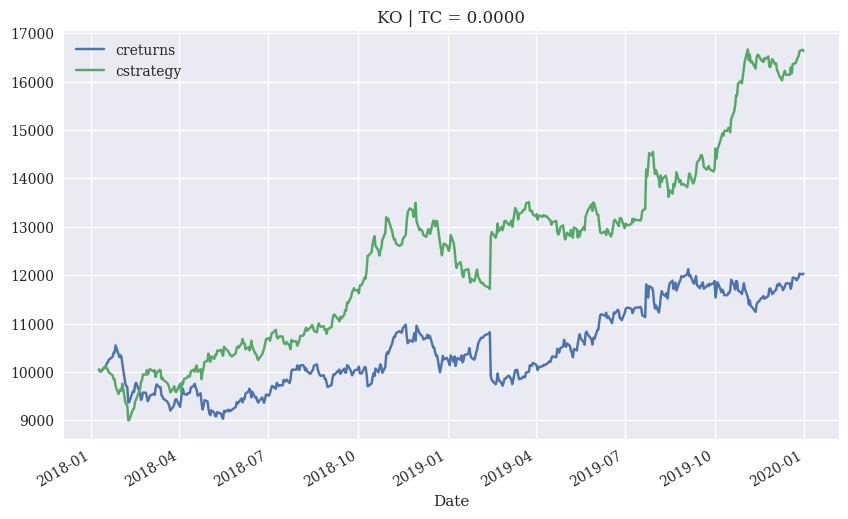

In [1418]:
lrbt.plot_results() 